#  Titanic dataset


# Importing Libraries 

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [68]:
train_data = pd.read_csv("train.csv")

# EDA

In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
df_num = train_data[["Age", "SibSp", "Parch", "Fare"]]
df_cat = train_data[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

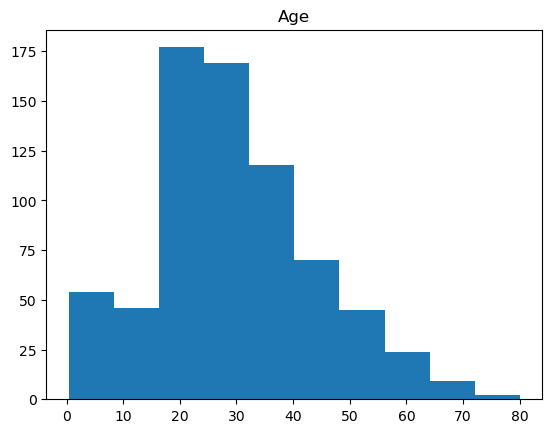

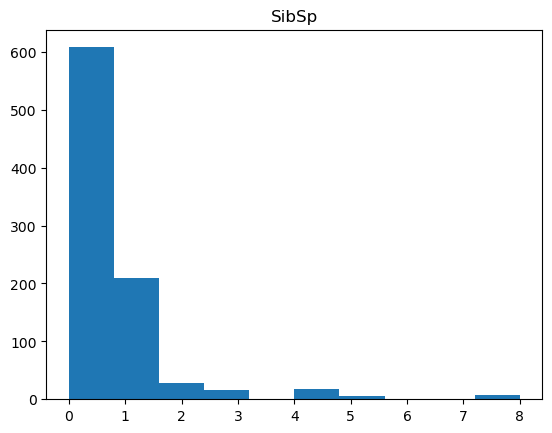

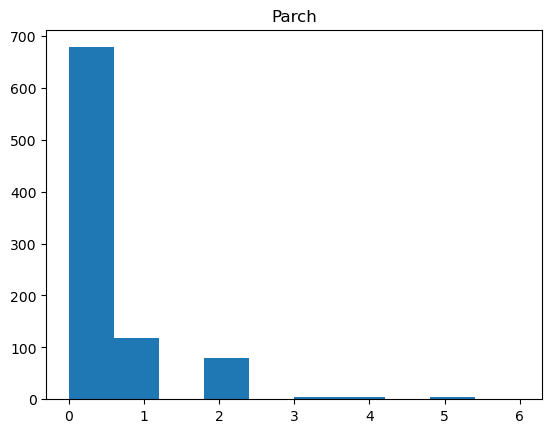

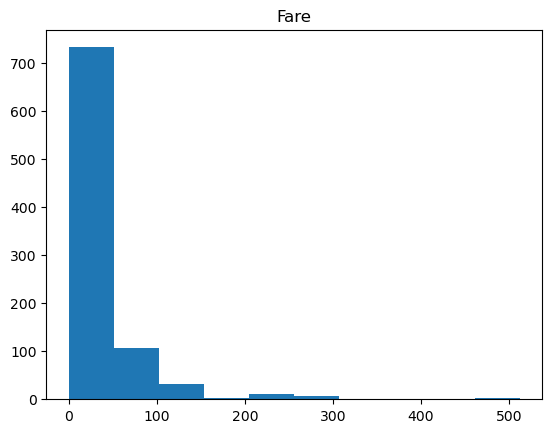

In [71]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

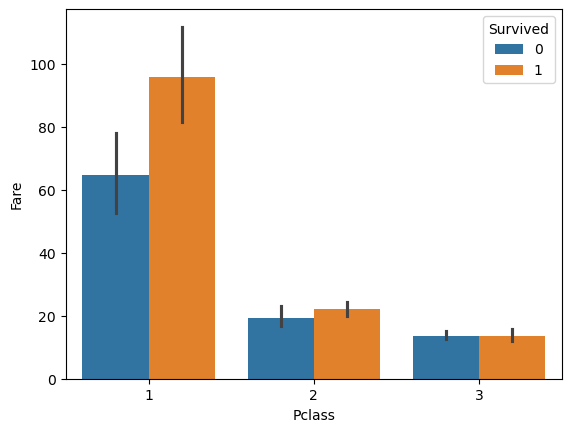

In [72]:
sns.barplot(data=train_data, x="Pclass", y="Fare", hue="Survived")

In [73]:
pd.pivot_table(train_data, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


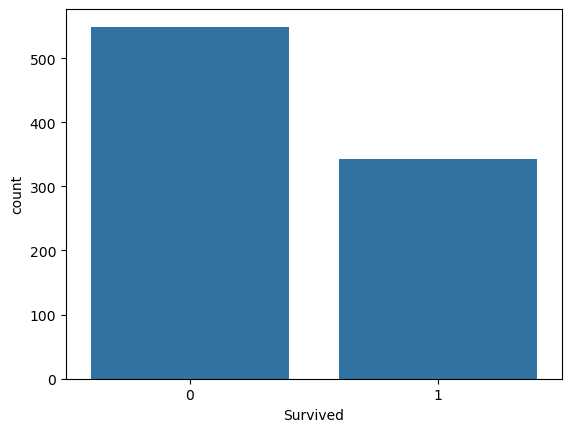

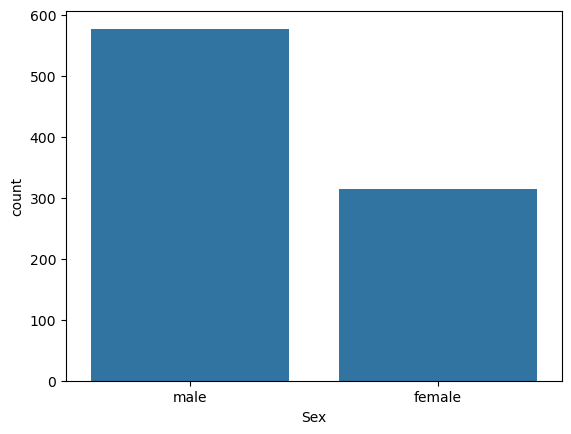

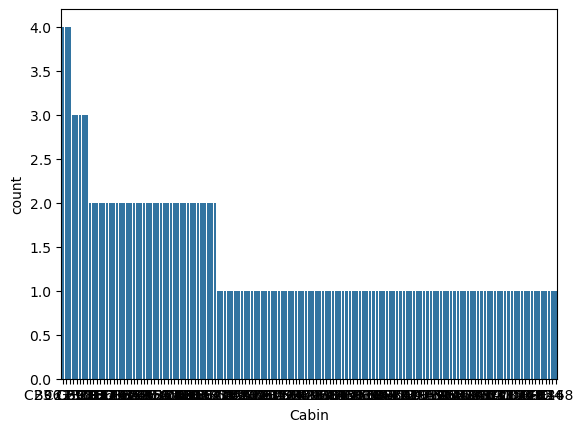

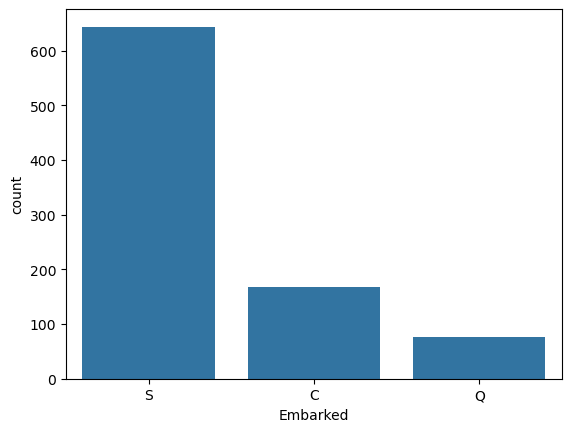

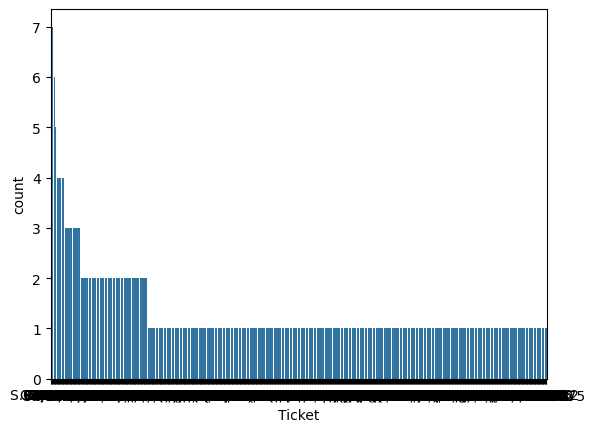

In [74]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

In [75]:
x = pd.DataFrame(
    (
        pd.pivot_table(
            train_data,
            index="Survived",
            columns="Sex",
            values="Ticket",
            aggfunc="count",
        )
    )
)
print()
print(
    pd.pivot_table(
        train_data, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"
    )
)
print()
print(
    pd.pivot_table(
        train_data,
        index="Survived",
        columns="Embarked",
        values="Ticket",
        aggfunc="count",
    )
)
print()
x


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



Sex,female,male
Survived,,
0,81,468
1,233,109


# Data Cleaning  

In [76]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
train_data = train_data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [78]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())

In [79]:
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [80]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Enginneering 

In [81]:
train_data["Fare"] = np.log(train_data["Fare"] + 1)

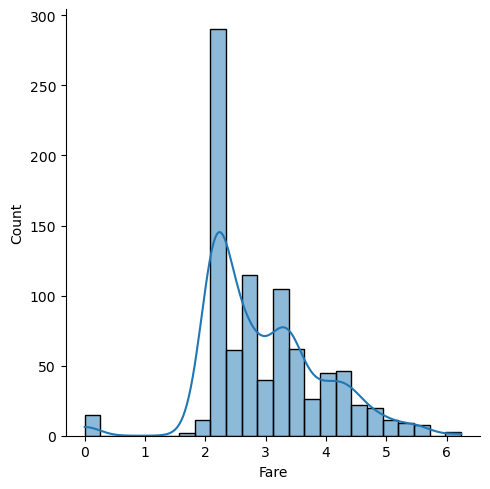

In [82]:
sns.displot(train_data["Fare"], kde=True)

<Axes: >

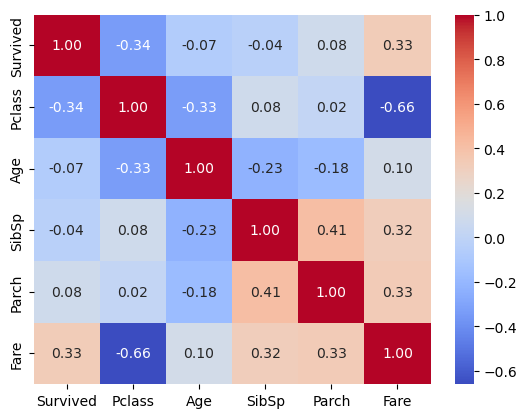

In [83]:
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [84]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


In [85]:
X = train_data.drop(columns=["Survived"], axis=1)
y = train_data["Survived"]
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,2.110213,2
1,1,1,0,38.000000,1,0,4.280593,0
2,1,3,0,26.000000,0,0,2.188856,2
3,1,1,0,35.000000,1,0,3.990834,2
4,0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2.639057,2
887,1,1,0,19.000000,0,0,3.433987,2
888,0,3,0,29.699118,1,2,3.196630,2
889,1,1,1,26.000000,0,0,3.433987,0


# Parameters of Model  

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score


def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV SCORE :", np.mean(score))

In [87]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7668161434977578
CV SCORE : 0.766580880045195


In [88]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 247, number of negative: 421
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369760 -> initscore=-0.533244
[LightGBM] [Info] Start training from score -0.533244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [89]:
from xgboost import XGBClassifier

model = XGBClassifier()
classify(model)

Accuracy 0.7937219730941704
CV SCORE : 0.8159751428033394


In [90]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)

Accuracy 0.7982062780269058
CV SCORE : 0.808097420124286


In [91]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model)

Accuracy 0.7937219730941704
CV SCORE : 0.7980101688531793


In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy 0.8116591928251121
CV SCORE : 0.7833971502102819
